In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import confusion_matrix

path="AirstripVideo/Images"

def get_images(path, image_type):
    image_list = []
    for filename in glob.glob(path + '/*'+ image_type):
        im=cv2.imread(filename)
        image_list.append(im)
    return image_list

In [2]:

image_list = get_images(path, '.bmp')
temp=np.array(image_list)

In [3]:
temp.shape

(4, 288, 360, 3)

In [4]:

p="AirstripVideo/BakSubGroundTruth"

def get_images(path, image_type):
    image_list = []
    for filename in glob.glob(path + '/*'+ image_type):
        im=cv2.imread(filename,0)
        image_list.append(im)
    return image_list




image = get_images(p, '.bmp')
ground=np.array(image)


In [5]:
ground.shape

(4, 288, 360)

In [6]:
temp.shape

(4, 288, 360, 3)

In [7]:


n=temp.shape[0]  #No. of images
I=np.zeros((n,288,360,3))
I=temp


M=np.zeros((n,288,360,3))

M[0,:,:,:]=I[0,:,:,:]

#Image.fromarray(I[0,:,:]).show()
Vt=np.zeros((n,288,360,3))
Vt[0,:,:,:]=9





Dt=np.zeros((n,288,360,3))


Ct=np.zeros((n,288,360))

In [8]:

##Foreground Detection


out=np.zeros((n,288,360))

Fm=np.zeros((n,288,360))



         
vCt=np.zeros((n,288,360))


def kronc(k):
    if(k==0):
        value=1
    else:
        value=0
    return(value)
l=[0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0]

In [9]:

value_of_vCt=[]


value=np.zeros((7,n))

TPR=np.zeros(8)   
FPR=np.zeros(8) 
len(l)


8

In [10]:


for lamb in range(len(l)):
    for p in range(1,n):
        Dt[p,:,:,:] = I[p,:,:,:]-M[p-1,:,:,:]
        Dt_square=np.square(Dt)
      
        for q in range(288):
            for r in range(360):
                #Foreground Detection
               
                if(Dt_square[p,q,r,0] <= np.square(l[lamb])*Vt[p-1,q,r,0]  and  
                   Dt_square[p,q,r,1] <= np.square(l[lamb])*Vt[p-1,q,r,1] and
                   Dt_square[p,q,r,2] <= np.square(l[lamb])*Vt[p-1,q,r,2]  ):
                  
                    Ct[p,q,r]=0
                   
                else:
                    Ct[p,q,r]=255
                
                x=Ct[p,:,:]
                mat=np.zeros((292,364))
                mat[2:2+x.shape[0],2:2+x.shape[1]]+=x      
                out[p,q-2,r-2]=np.count_nonzero(mat[q-2:q+3,r-2:r+3] == 255)
                           
                Fm[p,:,:]=out[p,:,:]/25
    
        for q in range(288):
            for r in range(360):
                  if(Fm[p,q,r]>=0.6):
                    vCt[p,q,r]=255
                  else:
                    vCt[p,q,r]=0
        #value_of_vCt.append(vCt)
      
                  if(n <= 100):
                    iteration=1/n
                    M[p,q,r,:]=M[p-1,q,r,:]+kronc(vCt[p,q,r])*(1/n)*Dt[p,q,r,:]
                    first=(kronc(vCt[p,q,r]-255))* (Vt[p-1,q,r,:])
                    Vt[p,q,r,:]=first+kronc(vCt[p,q,r])*( (1-iteration) * Vt[p-1,q,r,:] +iteration*Dt_square[p,q,r,:])
                     
                  else:
                    M[p,q,r,:]=M[p-1,q,r,:]+kronc(vCt[p,q,r])*0.01*Dt[p,q,r,:]
                    first=(kronc(vCt[p,q,r]-255))* (Vt[p-1,q,r,:])
                    Vt[p,q,r,:]=first+kronc(vCt[p,q,r])*( (1-0.01) * Vt[p-1,q,r,:] +0.01*Dt_square[p,q,r,:])      
     
    #for i in range(0,n):
    act=ground.ravel()
    pred=vCt.ravel()
    tn, fp, fn, tp = confusion_matrix(act,pred).ravel()
    
            #(tn, fp, fn, tp)
    TPR[lamb]=tp/(tp+fn)
    FPR[lamb]=fp/(fp+tn)
    
        


In [11]:
Image.fromarray(vCt[1,:,:]).show()

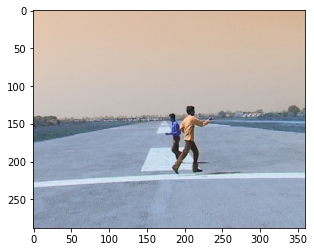

In [12]:
plt.imshow(I[1,:,:])

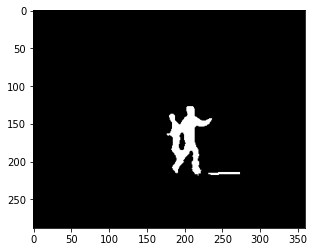

In [13]:
plt.imshow(vCt[1,:,:],cmap='gray')

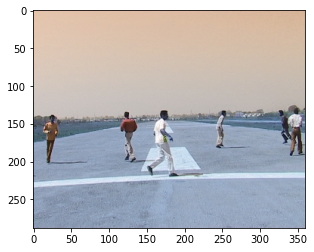

In [14]:
plt.imshow(I[3,:,:,:])

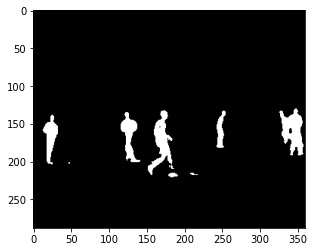

In [15]:
plt.imshow(vCt[3,:,:],cmap='gray')

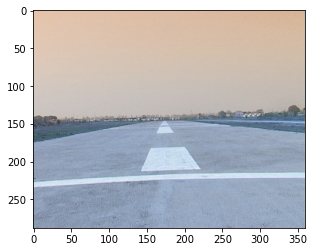

In [16]:
plt.imshow(I[0,:,:,:])

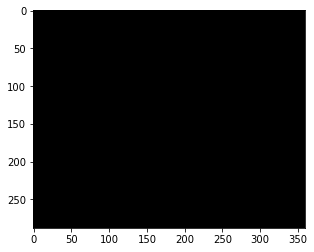

In [17]:
plt.imshow(vCt[0,:,:],cmap='gray')

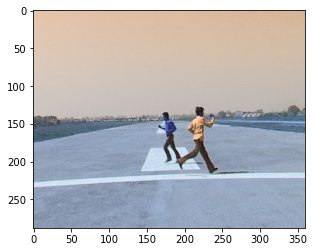

In [21]:
plt.imshow(I[2,:,:])

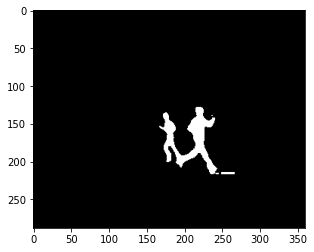

In [23]:
plt.imshow(vCt[2,:,:],cmap='gray')

In [18]:
FPR

array([0.60515098, 0.09804256, 0.01312457, 0.00703799, 0.00449265,
       0.00307418, 0.00227351, 0.00175208])

In [19]:
TPR

array([0.99990059, 0.99711701, 0.96351526, 0.9179839 , 0.87613083,
       0.84223084, 0.81479272, 0.78854757])

Text(0.5, 1.0, 'ROC CURVE')

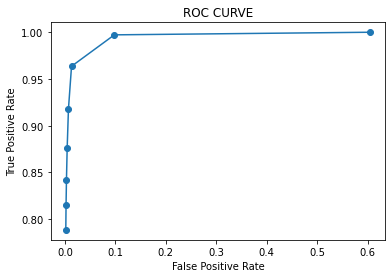

In [20]:

import matplotlib.pyplot as plt

plt.plot(FPR,TPR,"o-")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
